In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import shap
from collections import Counter

## Data Preprocessing

In [2]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT1.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT2.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT3.csv"

BHT_1 = pd.read_csv(path_1, sep=';')
BHT_1.drop(columns=['Unnamed: 0'], inplace=True)
BHT_2 = pd.read_csv(path_2, sep=';')
BHT_2.drop(columns=['Unnamed: 0'], inplace=True)
BHT_3 = pd.read_csv(path_3, sep=',')
BHT_3.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Train test split function

### Search Space / Param Grid 

In [4]:
from hyperopt import *
search_space = {
    'n_estimators': hp.choice('n_estimators', list(range(5, 100, 5))),  # Number of boosting rounds
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.8),  # Step size shrinkage
    'booster': hp.choice('booster', ['gbtree']),
    'max_depth': hp.choice('max_depth', list(range(4, 12))),  # Tree depth
    'subsample': hp.uniform('subsample', 0.4, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0.01, 0.1),  # L2 regularization term on weights
    'min_child_weight': hp.uniform('min_child_weight', 0.1, 2),  # Minimum sum of instance weight in a child
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0.1 , 2.5),  # Balancing class weights for imbalanced dat
}


## BHT semester 1

In [5]:
hpo = ModelTrainer(random_state=42)

# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(BHT_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
x, y = hpo.split_data(BHT_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 233 | 0: 28


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:03<00:00,  2.59trial/s, best loss: -0.6850071123755334]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            02               04
	 actual 1            04               43

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.536384823724525, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.6886216911482456, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 0.5935009984206435, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': 0.06730278810476094, 'sa

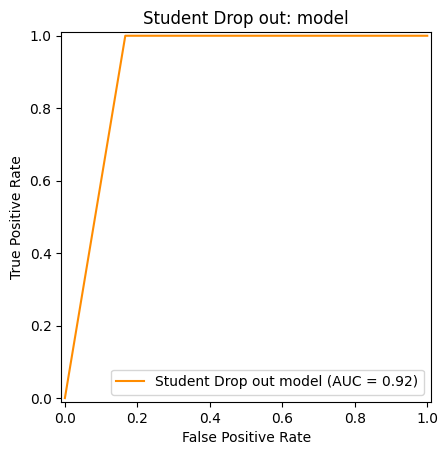

In [6]:
hpo = ModelTrainer(random_state=42)
model, feature_importance = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [7]:
feature_importance

,Feature,Importance
3,M04_1_N,0.385380
1,M02_1_N,0.165947
4,M05_1_N,0.139253
5,M06_1_N,0.128794
0,M01_1_N,0.112348
2,M03_1_N,0.068278


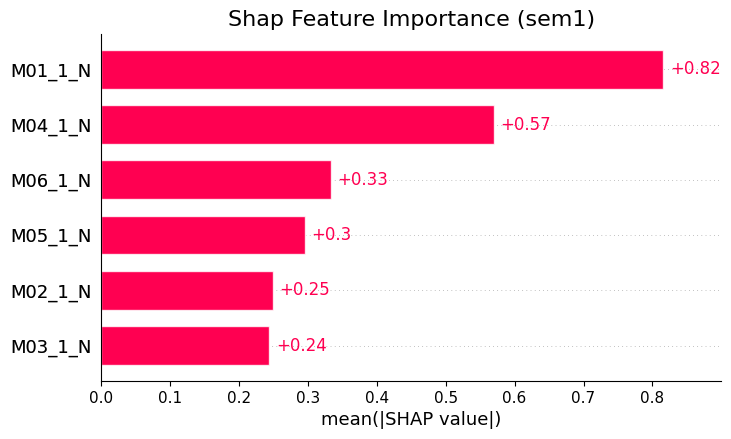

In [8]:
## Shap Global explainations
import shap
explainer = shap.Explainer(model['model'], model['x_train'])
shap_values = explainer(model['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values)

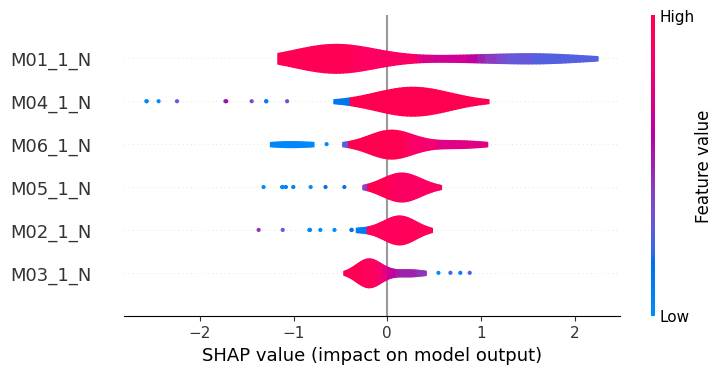

In [9]:
shap.plots.violin(shap_values, show=True)

In [10]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values, link='logit')

In [11]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=11, model_name='xgb')

Student index 11 grades:
         grades
M01_1_N     1.7
M02_1_N     1.7
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     1.0
Status: 1, Prediction: [1], Probability [0]: 0.042, Probability [1]: 0.958


In [12]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=24, model_name='xgb')

Student index 24 grades:
         grades
M01_1_N     2.7
M02_1_N     3.0
M03_1_N     1.0
M04_1_N     5.1
M05_1_N     2.3
M06_1_N     3.3
Status: 1, Prediction: [1], Probability [0]: 0.024, Probability [1]: 0.976


In [13]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=10, model_name='xgb')

Student index 10 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.132, Probability [1]: 0.868


In [14]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=4, model_name='xgb')

Student index 4 grades:
         grades
M01_1_N     2.0
M02_1_N     1.7
M03_1_N     1.0
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     2.3
Status: 1, Prediction: [1], Probability [0]: 0.006, Probability [1]: 0.994


## BHT semester 2 

In [15]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(BHT_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=72)
x2, y2 = hpo2.split_data(BHT_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 156 | 0: 27


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:02<00:00,  3.55trial/s, best loss: -0.6878333333333333]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            01               04
	 actual 1            02               30

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.7609006371016693, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.5335535937261725, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': 0.8343887503166505, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 72, 'reg_alpha': None, 'reg_lambda': 0.08880254141075039, 's

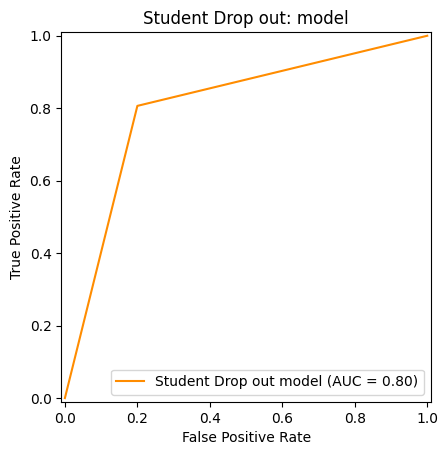

In [16]:
model_2, feature_importance_2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [17]:
feature_importance_2

,Feature,Importance
9,M10_2_N,0.692401
3,M04_2_N,0.236469
1,M02_2_N,0.056768
5,M06_2_N,0.014362
0,M01_2_N,0.000000
2,M03_2_N,0.000000
4,M05_2_N,0.000000
6,M07_2_N,0.000000
7,M08_2_N,0.000000
8,M09_2_N,0.000000


#### Shap analysis

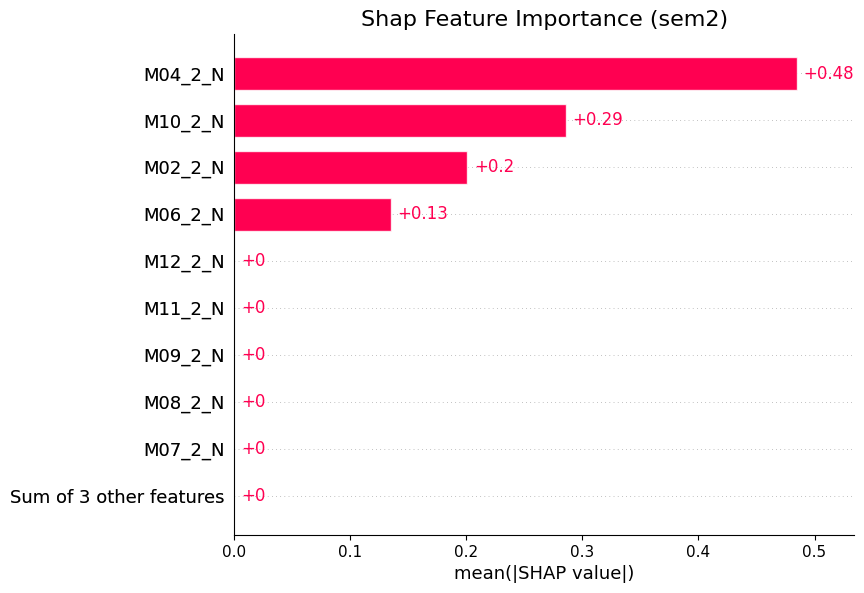

In [18]:
## Shap Global explainations
import shap
explainer2 = shap.Explainer(model_2['model'], model_2['x_train'])
shap_values2 = explainer2(model_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2)

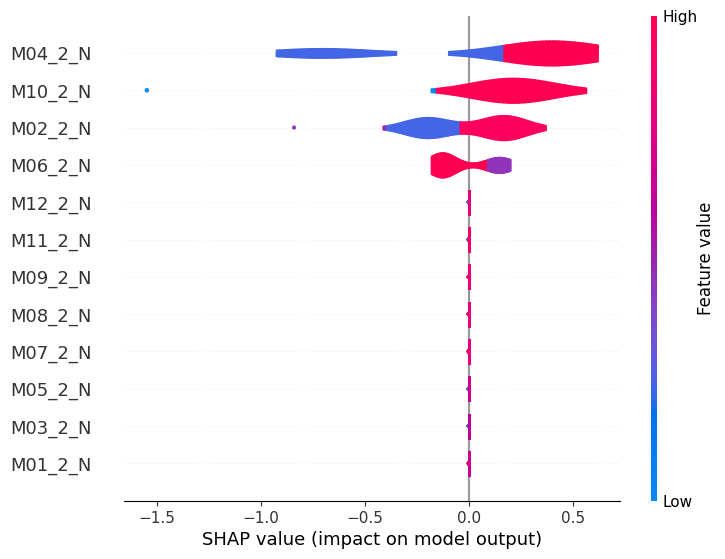

In [19]:
shap.plots.violin(shap_values2, show=True)

In [20]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2, link='logit')

In [21]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=33, model_name='xgb')

Student index 33 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     1.0
M04_2_N     3.0
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [0], Probability [0]: 0.508, Probability [1]: 0.492


In [22]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=11, model_name='xgb')

Student index 11 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     1.0
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.255, Probability [1]: 0.745


In [23]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=2, model_name='xgb')

Student index 2 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.255, Probability [1]: 0.745


In [24]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=5, model_name='xgb')

Student index 5 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.255, Probability [1]: 0.745


## BHT semester 3

In [25]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(BHT_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
# Count occurrences of each unique value in the 'status' column
hpo3 = ModelTrainer(random_state=42)
x3, y3 = hpo3.split_data(BHT_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 114 | 0: 26


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:04<00:00,  2.47trial/s, best loss: -0.7664327485380117]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            04               01
	 actual 1            04               19

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5465479831439531, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.16412953680985604, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 1.3459553612052264, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': 0.07083648510548977, '

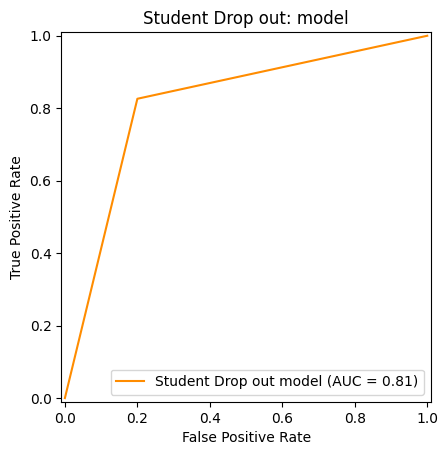

In [26]:
model_3, feature_importance_3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [27]:
feature_importance_3

,Feature,Importance
13,M14_3_N,0.199890
8,M09_3_N,0.159224
9,M10_3_N,0.123080
14,M15_3_N,0.075792
12,M13_3_N,0.072275
7,M08_3_N,0.068018
15,M16_3_N,0.061194
3,M04_3_N,0.045450
4,M05_3_N,0.044133
2,M03_3_N,0.041342


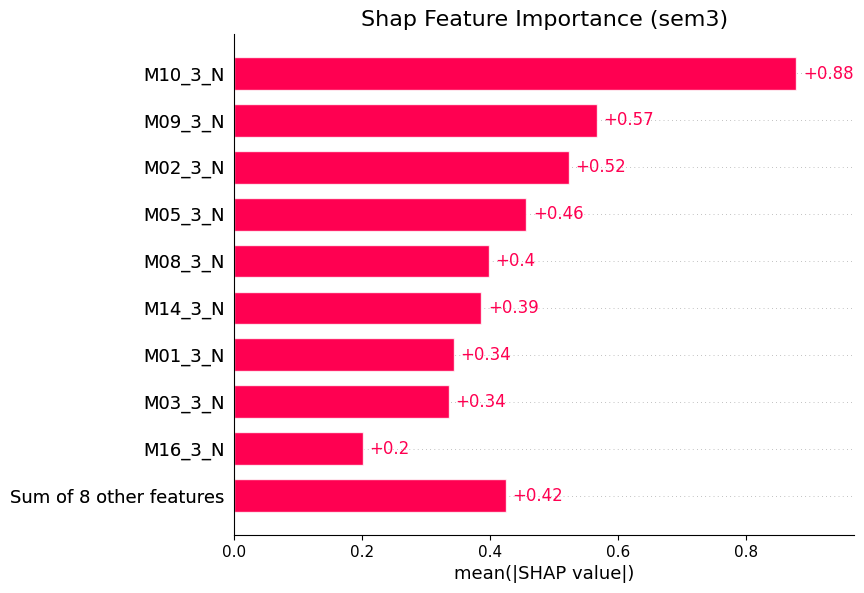

In [28]:
## Shap Global explainations
import shap
explainer3 = shap.Explainer(model_3['model'], model_3['x_train'])
shap_values3 = explainer3(model_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3)

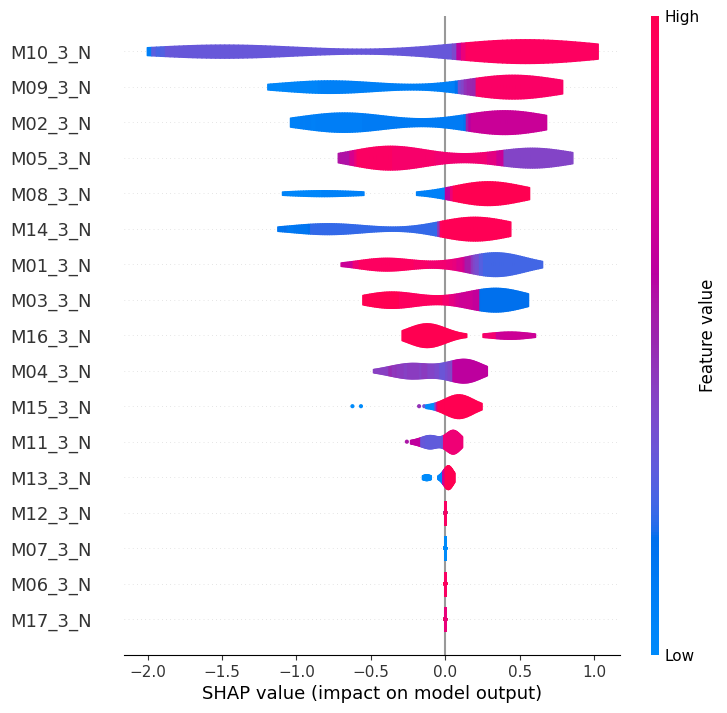

In [29]:
shap.plots.violin(shap_values3, show=True)

In [30]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3, link='logit')

In [31]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=1, model_name='xgb')

Student index 1 grades:
         grades
M01_3_N     1.7
M02_3_N     1.0
M03_3_N     1.0
M04_3_N     2.7
M05_3_N     1.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.030, Probability [1]: 0.970


In [32]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=4, model_name='xgb')

Student index 4 grades:
         grades
M01_3_N     1.0
M02_3_N     1.7
M03_3_N     1.3
M04_3_N     1.0
M05_3_N     1.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.0
M09_3_N     1.0
M10_3_N     2.3
M11_3_N     2.0
M12_3_N     5.1
M13_3_N     1.0
M14_3_N     1.3
M15_3_N     1.0
M16_3_N     1.0
M17_3_N     1.3
Status: 0, Prediction: [0], Probability [0]: 0.854, Probability [1]: 0.146


In [33]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=14, model_name='xgb')

Student index 14 grades:
         grades
M01_3_N     4.0
M02_3_N     3.7
M03_3_N     1.3
M04_3_N     2.0
M05_3_N     4.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     3.7
M10_3_N     5.1
M11_3_N     4.0
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     3.0
Status: 1, Prediction: [1], Probability [0]: 0.061, Probability [1]: 0.939
